<a href="https://colab.research.google.com/github/the-cryptozoologist/data-analysis/blob/main/stats/law_of_large_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Law of Large Numbers (LLN)

## Definition

As the number of experiment repetitions increases, the average of the sample means better approximates the population mean.

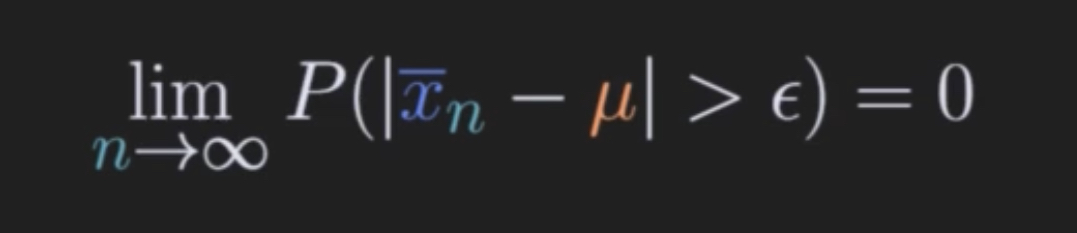

µ = population mean (true value)
x(bar)n = sample mean (the average of the sample population)

As the limit nears infinity (the sample population increases), the probability of the difference between the sample mean and the population mean (abs value) being greater than an arbitrarily small number (epsilon) nears 0.


**Essentially, one sample or one experiment is unlikely to provide a good estimate of the true population mean.**

Sampling many times can provide an accurate estimation of the true population mean.

## Generate a population of numbers

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style("whitegrid")

Text(0, 0.5, 'Data')

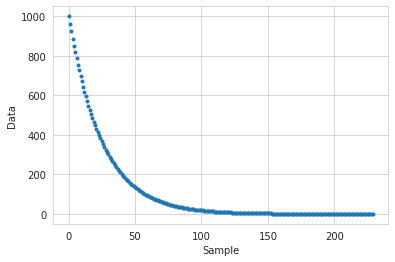

In [ ]:
# Simulation parameters

population_size = 2.3e5

# Generate the population of numbers

population = 1/ np.logspace(np.log10(.001),np.log10(10),int(population_size))

skip = int(1e3)

plt.plot(population[::skip], ".")
plt.xlabel("Sample")
plt.ylabel("Data")

Text(0, 0.5, 'Data')

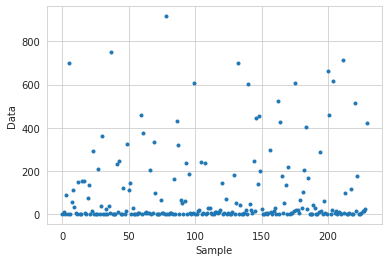

In [ ]:
# Shuffle data

np.random.shuffle(population)

plt.plot(population[::skip], ".")
plt.xlabel("Sample")
plt.ylabel("Data")

In [ ]:
# True mean

true_mean = np.mean(population)

## Monte Carlo sampling

In [ ]:
# Simulation parameters

sample_size = 50

sample_number = 500

Draw and average {sample_size} data points at random from the population {sample_number} times in total.

In [ ]:
sample_means = np.zeros(sample_number)

for exp in range(sample_number):
  randsample = np.random.choice(population, size = sample_size)
  sample_means[exp] = np.mean(randsample)

Text(0, 0.5, 'Mean value')

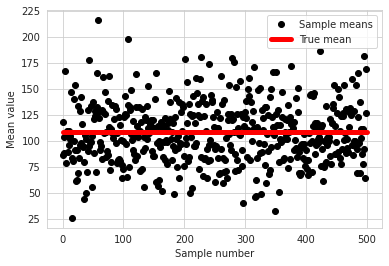

In [ ]:
plt.plot(sample_means, "ko", label="Sample means")
plt.plot([0,sample_number], [true_mean, true_mean], "r", linewidth=5, label="True mean")
plt.legend()
plt.xlabel("Sample number")
plt.ylabel("Mean value")

## Cumulative averaging

In [ ]:
def cum_avg(arr):
  cum_sum = np.cumsum(arr,axis=0)
  for i in range(cum_sum.shape[0]):
    if i == 0:
      continue
    cum_sum[i] = cum_sum[i]/(i+1)
  return cum_sum

Text(0, 0.5, 'Cumulative mean')

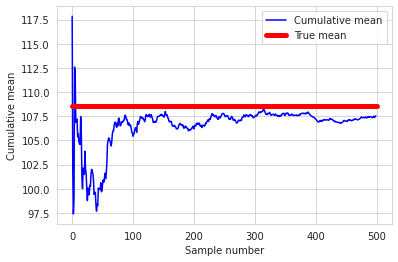

In [ ]:
cumulative_mean = cum_avg(sample_means)

plt.plot(cumulative_mean, "blue", label="Cumulative mean")
plt.plot([0,sample_number], [true_mean, true_mean], "r", linewidth=5, label="True mean")
plt.legend()
plt.xlabel("Sample number")
plt.ylabel("Cumulative mean")

In [ ]:
meta_samples = 100

cumavgs = np.zeros((meta_samples, sample_number))
allsamplemeans = np.zeros((meta_samples, sample_number))

for meta in range(meta_samples):
  for exp in range(sample_number):
    randsample = np.random.choice(population, size = sample_size)
    sample_means[exp] = np.mean(randsample)
  temp = np.cumsum(sample_means)/np.arange(1,sample_number+1)
  cumavgs[meta,:] = (temp-true_mean)**2 
  allsamplemeans[meta,:] = sample_means

No handles with labels found to put in legend.


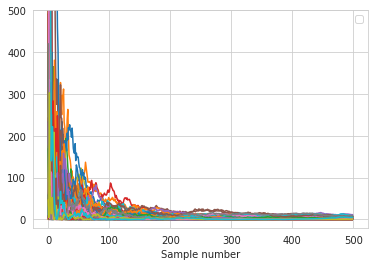

In [ ]:
plt.plot(cumavgs.T)
plt.ylim([-20, 500])
plt.legend()
plt.xlabel("Sample number")
plt.show()

## Central limit theorem

The distribution of sample means ~ Gaussian

Text(0, 0.5, 'Count')

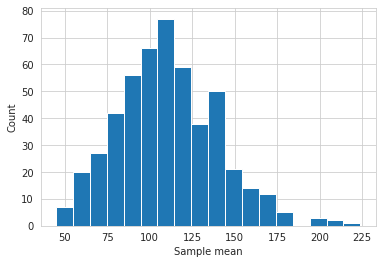

In [ ]:
plt.hist(sample_means, bins="fd")

plt.xlabel("Sample mean")
plt.ylabel("Count")


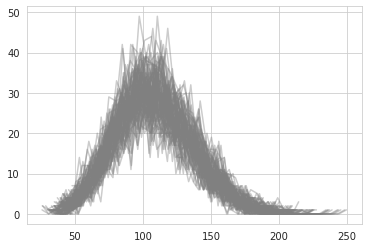

In [ ]:
nbins = 40
for i in range(meta_samples):
  y,x = np.histogram(allsamplemeans[i,:],bins=nbins)
  x = (x[1:]+x[:-1])/2
  plt.plot(x,y, color="grey", alpha=0.4)

plt.show()